In [1]:
using DataFrames, FileIO, DelimitedFiles
using Plots, Optim, LsqFit, JUMD
using Statistics, NamedArrays

In [2]:
# Get ready
dir_ctv_wat = "/home/pbarletta/labo/20/reobp/run/ctv/wat"
dir_ctv_watlig = "/home/pbarletta/labo/20/reobp/run/ctv/watlig"

aa = 119
nstlim = 12000
phs = collect(2.0:.5:7.5)
idx = collect(1:12)

titrable_resis = [4, 5, 11, 13, 20, 24, 30, 33, 37, 39, 40,
    48, 58, 73, 77, 78, 87, 93, 94, 97, 117]
titrable_resnames = ["GL4", "GL4", "HIP", "GL4", "GL4", "AS4",
    "AS4", "GL4", "AS4", "GL4", "AS4", "GL4", "AS4", "GL4", "AS4",
    "GL4", "AS4", "GL4", "GL4", "HIP", "AS4"]
titrable_cnt = length(titrable_resis)

idx_of_titrable = fill(0, aa)
[ idx_of_titrable[titrable_resis[i]] = i for i in 1:titrable_cnt ];

titrable_residues = [ string(titrable_resnames[i], "_", titrable_resis[i]) 
    for i in 1:titrable_cnt ];

In [3]:
for i in 1:12
    PH = convert(Int64, phs[i] * 10)
    global nhb_ctv_phs = convert(Array{Float64, 1},
    readdlm(joinpath(dir_ctv_watlig, string(phs[i]), "close_wat.dat"))[2:end, 3])

    sym_nhb_ctv_phs = Symbol("watlig_dist_", PH)
    eval(:($sym_nhb_ctv_phs = nhb_ctv_phs))
end

## N1 distance to closest water

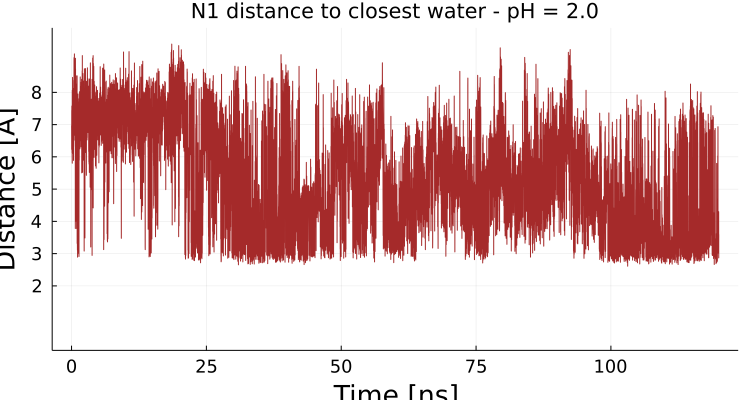

In [4]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_20,
    title = string("N1 distance to closest water - pH = ", 2.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

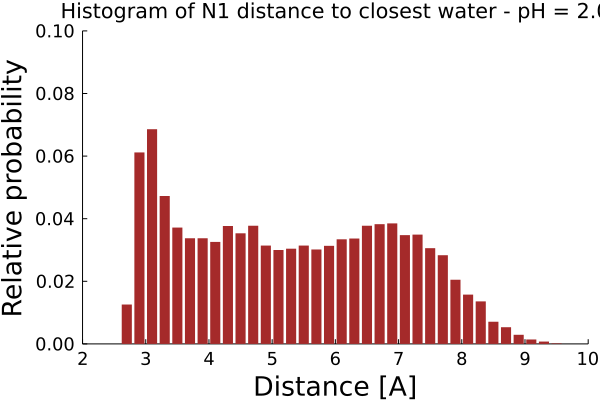

In [5]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .1),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 2.0),
    yaxis = "Relative probability", xaxis = "Distance [A]")

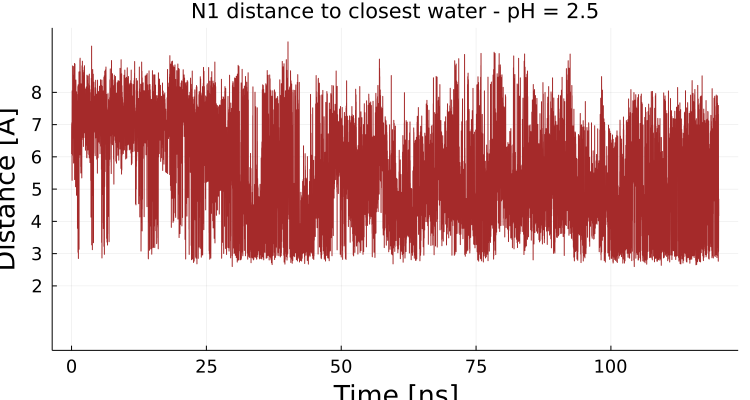

In [6]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_25,
    title = string("N1 distance to closest water - pH = ", 2.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

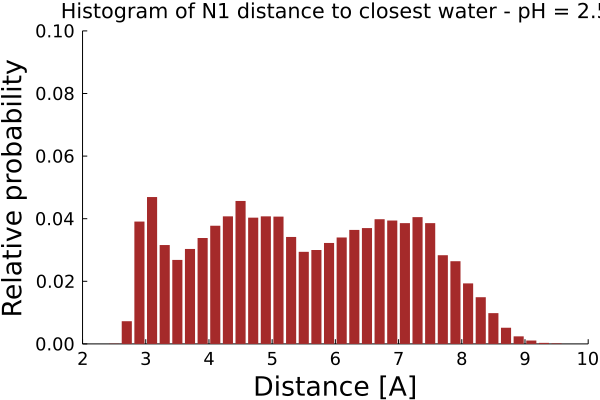

In [7]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_25))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_25, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .1),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 2.5),
    yaxis = "Relative probability", xaxis = "Distance [A]")

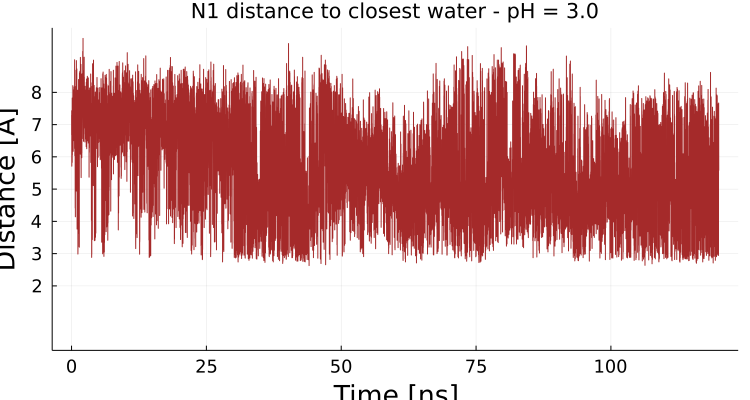

In [8]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_30,
    title = string("N1 distance to closest water - pH = ", 3.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

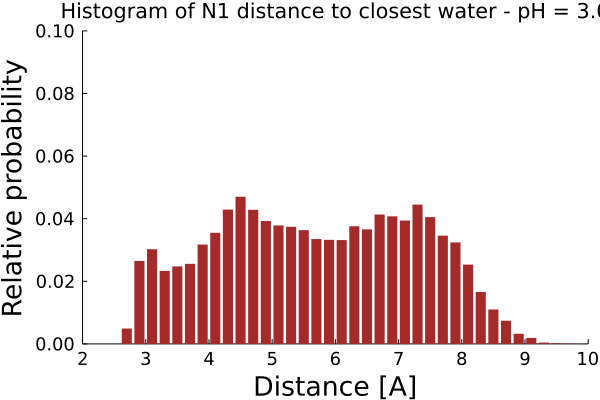

In [9]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_30))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_30, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .1),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 3.0),
    yaxis = "Relative probability", xaxis = "Distance [A]")

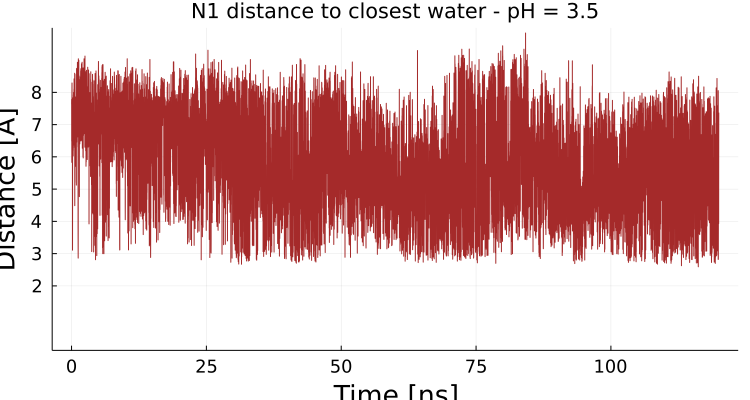

In [10]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_35,
    title = string("N1 distance to closest water - pH = ", 3.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

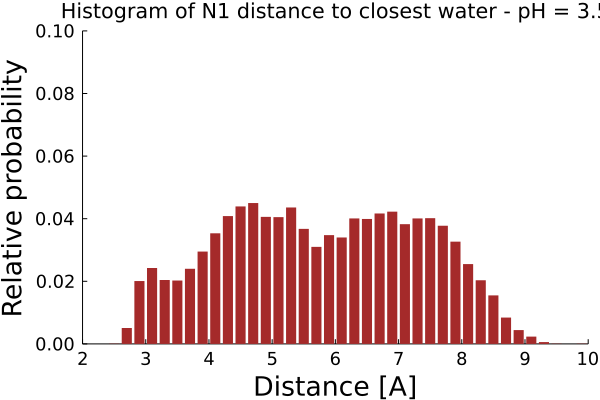

In [11]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_35))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_35, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .1),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 3.5),
    yaxis = "Relative probability", xaxis = "Distance [A]")

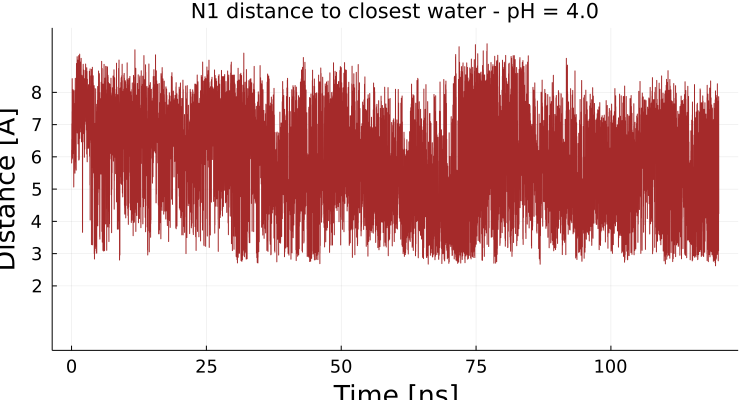

In [12]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_40,
    title = string("N1 distance to closest water - pH = ", 4.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

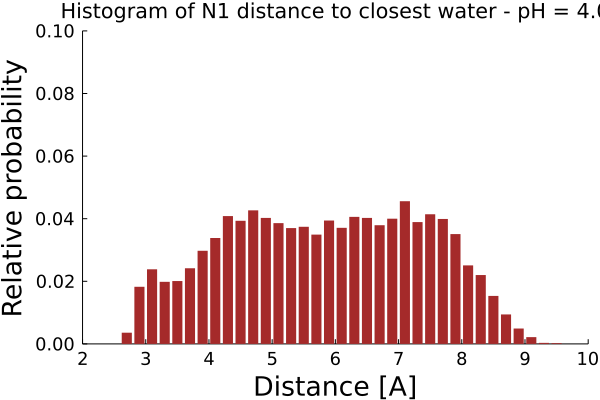

In [13]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_40))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_40, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .1),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 4.0),
    yaxis = "Relative probability", xaxis = "Distance [A]")

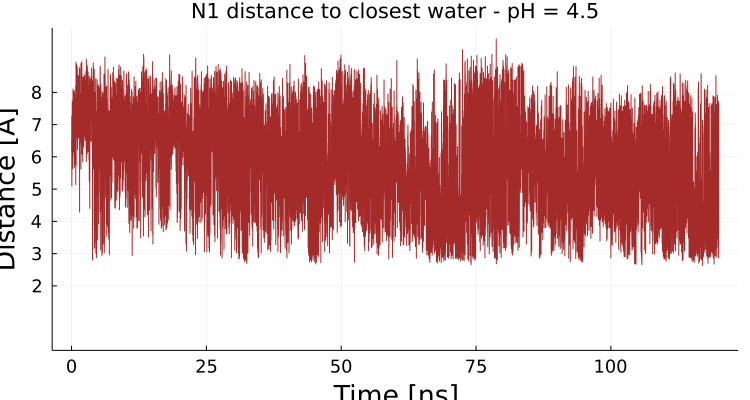

In [14]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_45,
    title = string("N1 distance to closest water - pH = ", 4.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

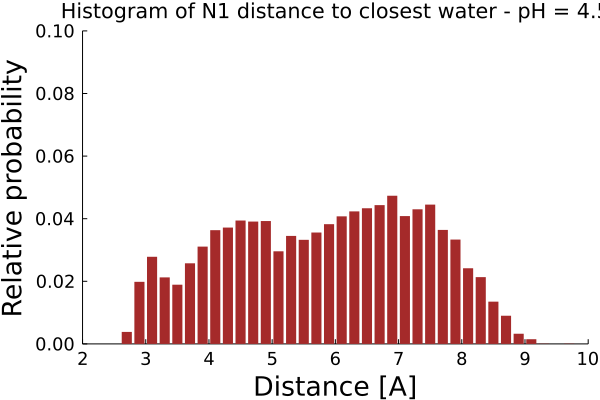

In [15]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_45))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_45, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .1),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 4.5),
    yaxis = "Relative probability", xaxis = "Distance [A]")

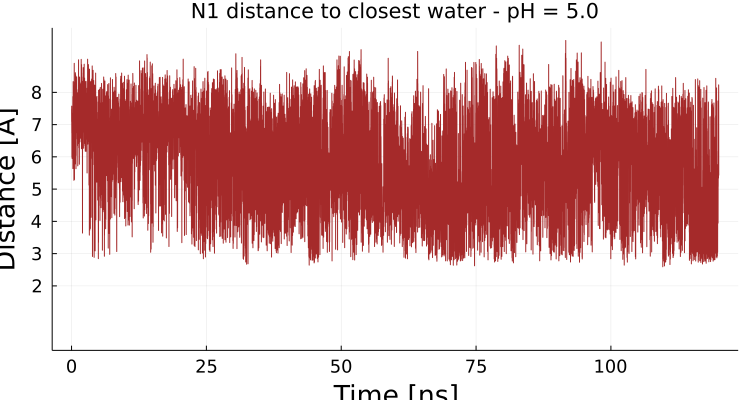

In [16]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_50,
    title = string("N1 distance to closest water - pH = ", 5.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

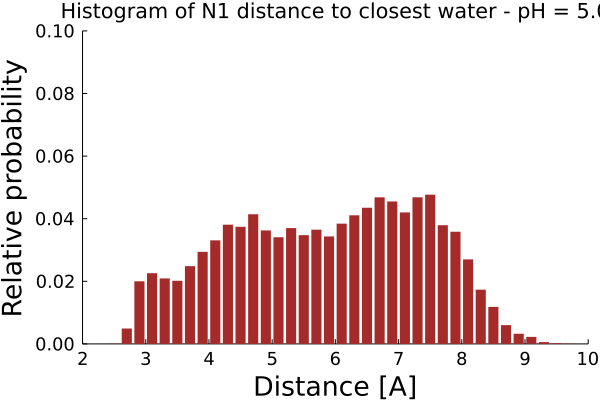

In [17]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_50))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_50, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .1),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 5.0),
    yaxis = "Relative probability", xaxis = "Distance [A]")

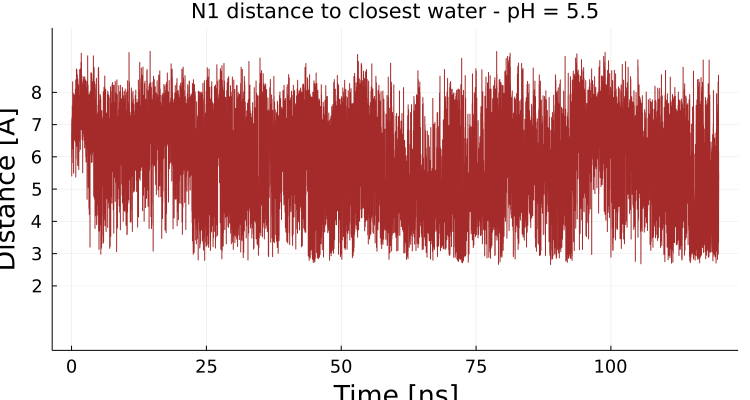

In [18]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_55,
    title = string("N1 distance to closest water - pH = ", 5.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

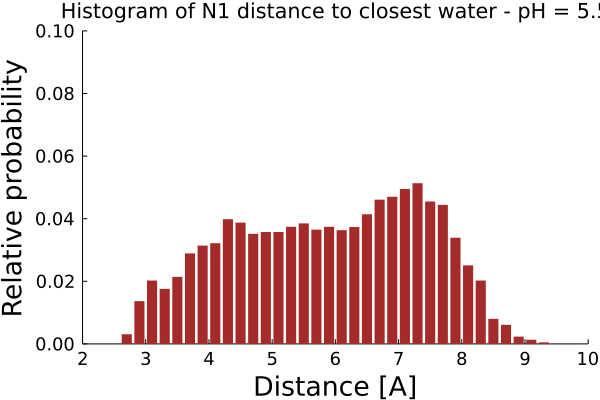

In [19]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_55))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_55, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .1),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 5.5),
    yaxis = "Relative probability", xaxis = "Distance [A]")

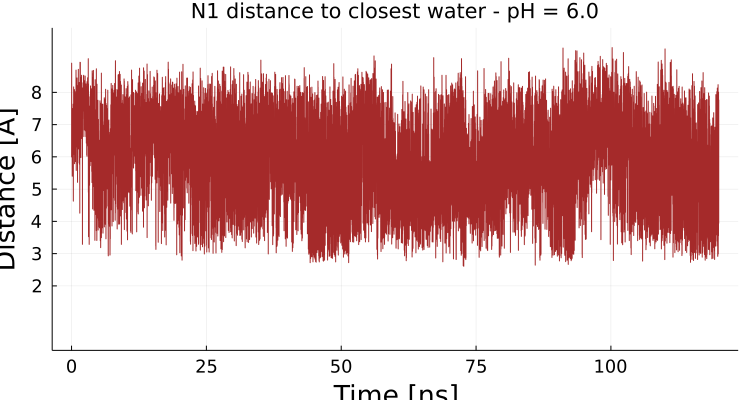

In [20]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_60,
    title = string("N1 distance to closest water - pH = ", 6.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

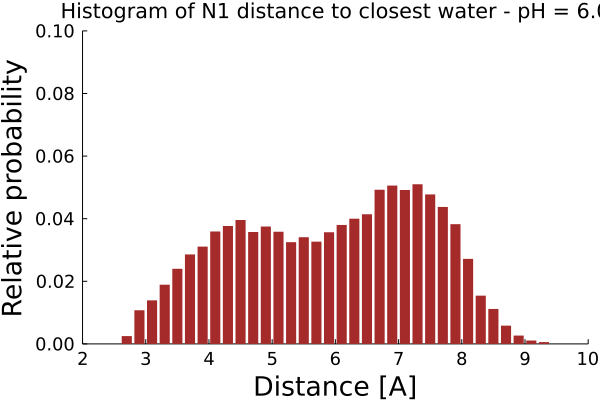

In [21]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_60))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_60, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .1),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 6.0),
    yaxis = "Relative probability", xaxis = "Distance [A]")

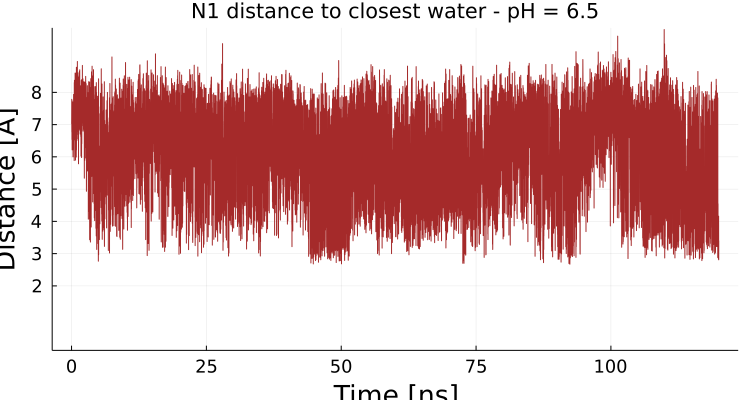

In [22]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_65,
    title = string("N1 distance to closest water - pH = ", 6.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

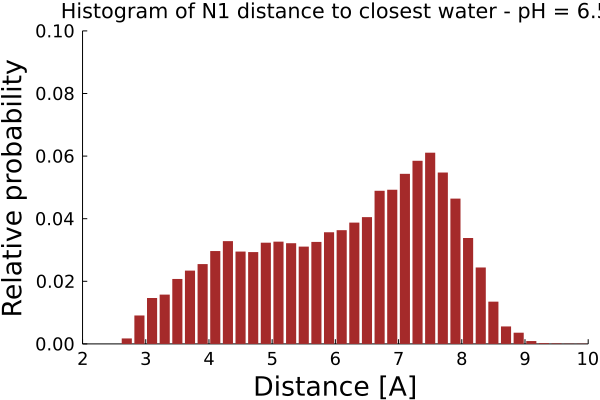

In [23]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_65))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_65, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .1),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 6.5),
    yaxis = "Relative probability", xaxis = "Distance [A]")

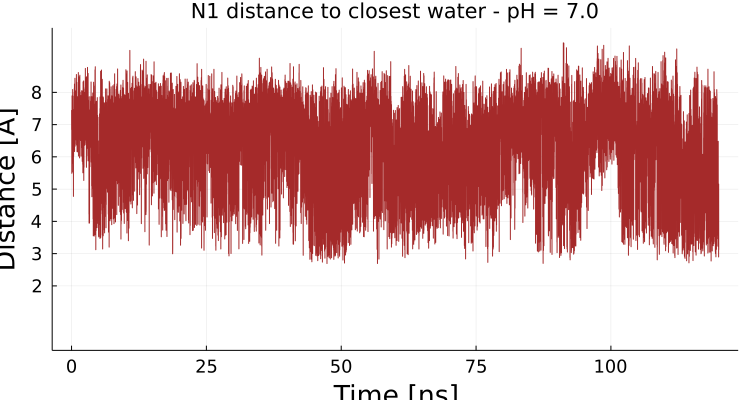

In [24]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_70,
    title = string("N1 distance to closest water - pH = ", 7.0), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

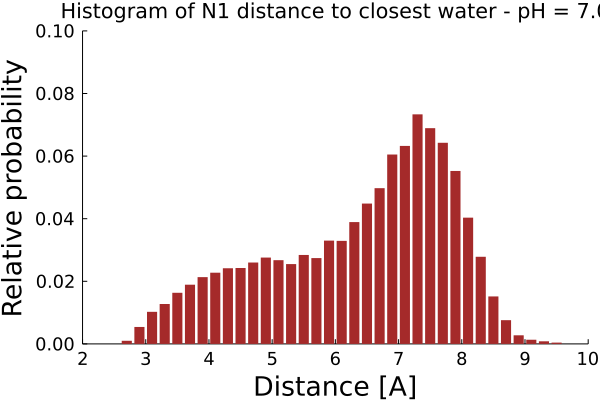

In [25]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_70))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_70, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .1),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 7.0),
    yaxis = "Relative probability", xaxis = "Distance [A]")

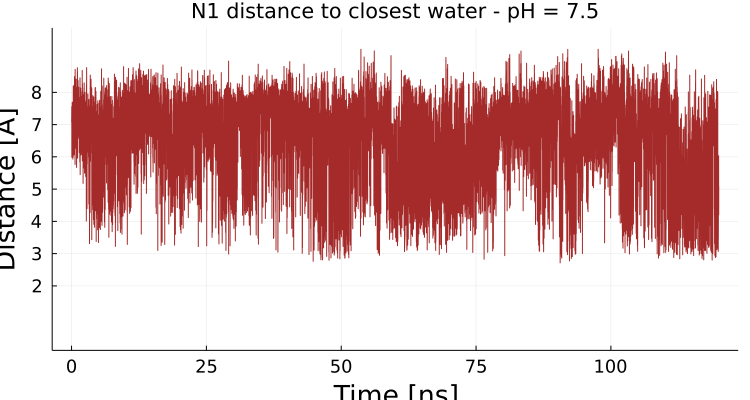

In [26]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_75,
    title = string("N1 distance to closest water - pH = ", 7.5), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

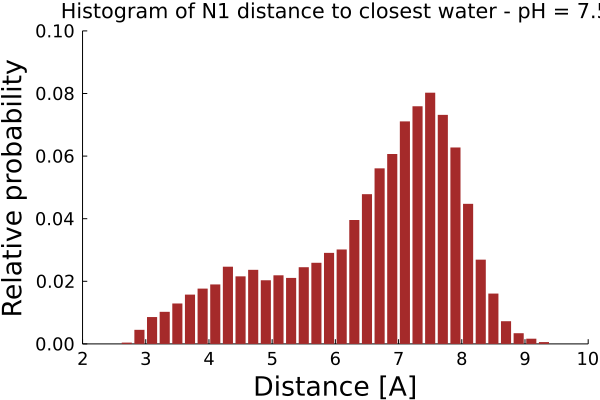

In [27]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_75))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_75, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .1),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 7.5),
    yaxis = "Relative probability", xaxis = "Distance [A]")

In [28]:
vals = vcat([ mean(watlig_dist_20) std(watlig_dist_20) std(watlig_dist_20) / mean(watlig_dist_20) ],
[ mean(watlig_dist_25) std(watlig_dist_25) std(watlig_dist_25) / mean(watlig_dist_25) ],
[ mean(watlig_dist_30) std(watlig_dist_30) std(watlig_dist_30) / mean(watlig_dist_30) ],
[ mean(watlig_dist_35) std(watlig_dist_35) std(watlig_dist_35) / mean(watlig_dist_35) ],
[ mean(watlig_dist_40) std(watlig_dist_40) std(watlig_dist_40) / mean(watlig_dist_40) ],
[ mean(watlig_dist_45) std(watlig_dist_45) std(watlig_dist_45) / mean(watlig_dist_45) ],
[ mean(watlig_dist_50) std(watlig_dist_50) std(watlig_dist_50) / mean(watlig_dist_50) ],
[ mean(watlig_dist_55) std(watlig_dist_55) std(watlig_dist_55) / mean(watlig_dist_55) ],
[ mean(watlig_dist_60) std(watlig_dist_60) std(watlig_dist_60) / mean(watlig_dist_60) ],
[ mean(watlig_dist_65) std(watlig_dist_65) std(watlig_dist_65) / mean(watlig_dist_65) ],
[ mean(watlig_dist_70) std(watlig_dist_70) std(watlig_dist_70) / mean(watlig_dist_70) ],
[ mean(watlig_dist_75) std(watlig_dist_75) std(watlig_dist_75) / mean(watlig_dist_75) ])

NamedArray(vals, (string.(phs), ["μ" ; "std" ; "μ/std"]))

12×3 Named Matrix{Float64}
A ╲ B │        μ       std     μ/std
──────┼─────────────────────────────
2.0   │  5.28556   1.67619  0.317125
2.5   │  5.50438   1.60867  0.292252
3.0   │  5.69961   1.57502  0.276338
3.5   │  5.79156   1.55682  0.268809
4.0   │  5.84068   1.55229  0.265773
4.5   │  5.82579   1.55319  0.266606
5.0   │  5.84943   1.54111  0.263463
5.5   │  5.87853   1.50843    0.2566
6.0   │  5.91558   1.50128  0.253784
6.5   │   6.1239   1.50212  0.245289
7.0   │  6.36619   1.44349  0.226743
7.5   │  6.51146   1.38978  0.213436